## Objective ##
This purpose of project is exploring relationships between the different attributes of the customers by data analysis and visualization. The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness.

## Import Libraries and Load Dataset ##

---



In [1]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
## Installation pandas-profiling step 

# For local host

import sys
!{sys.executable} -m pip install pandas-profiling  --user

# For google colab
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


# Please restart the kernel after installation

In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # set style makes the plot looks better

##  Data Analysis ##

---



The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

*  Product - The model no. of the treadmill
*  Age -  Age of the customer in no of years
*  Gender - Gender of the customer
*  Education - Education of the customer in no. of years
*  Marital Status - Marital status of the customer
*  Usage - Avg. # times the customer wants to use the treadmill every week
*  Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
*  Income - Income of the customer
*  Miles- Miles that a customer expects to run

In [4]:
# Load dataset
df=pd.read_csv('../Desktop/CardioGoodFitness.csv')

In [5]:
# Dataset preview
df.head()

# Read the data from the end
#df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# Check name of each column
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Check data types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
# Check count of data types
df.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [9]:
# Check number of rows and columns in the dataset
df.shape

(180, 9)

In [10]:
# Check number of uniqe attribute for each columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [11]:
# Check statistical summary of numerical values
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [12]:
# Check count of Product
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [13]:
# Check average income
df.Income.mean()

53719.57777777778

In [14]:
# Cut Income to three bins and create a new ccolumn called Income_Level
df['Income_Level'] = pd.cut(df.Income, bins=3, labels=['high', 'medium', 'low'])
print(df.Income_Level.value_counts())
df.head()

high      117
medium     44
low        19
Name: Income_Level, dtype: int64


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Level
0,TM195,18,Male,14,Single,3,4,29562,112,high
1,TM195,19,Male,15,Single,2,3,31836,75,high
2,TM195,19,Female,14,Partnered,4,3,30699,66,high
3,TM195,19,Male,12,Single,3,3,32973,85,high
4,TM195,20,Male,13,Partnered,4,2,35247,47,high


In [15]:
# Check the average age of customer for each product
df.groupby("Product")['Age'].mean().sort_values(ascending=False)

Product
TM798    29.10
TM498    28.90
TM195    28.55
Name: Age, dtype: float64

In [16]:
# Check number of customer whose age is greater than 30
len(df[df['Age'] >30])

60

In [17]:
# Check missing values
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

#missing_check(df)

# Or just using following command
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Income_Level     0
dtype: int64

## Data Visualization ##

**Univariate Data Visualization**

---

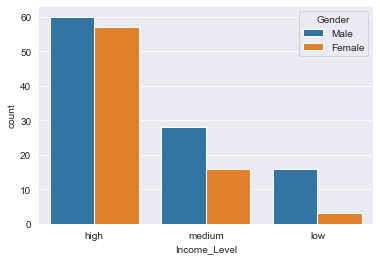

In [18]:
# Check Income_level versus count
sns.countplot(data = df, x='Income_Level',hue='Gender');

Observation:
1. We found most of customers have high incomes

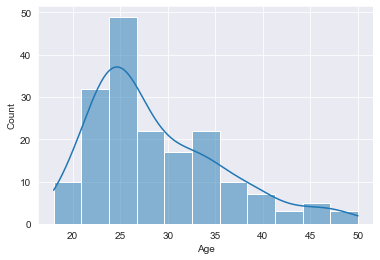

In [19]:
# Check age distribution

#plt.hist(df.Age, bins=50)
#sns.countplot(df.Age)
#sns.distplot(df.Age)
sns.histplot(df.Age,kde=True);

C:\Users\Lyndon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


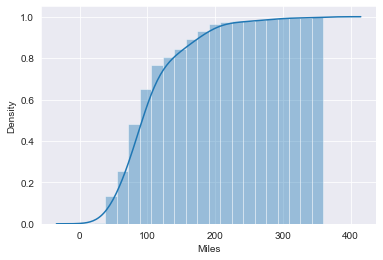

In [20]:
# Cumulative Distribution
sns.distplot(df.Miles, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

**Multivariate Data Visualization**

---

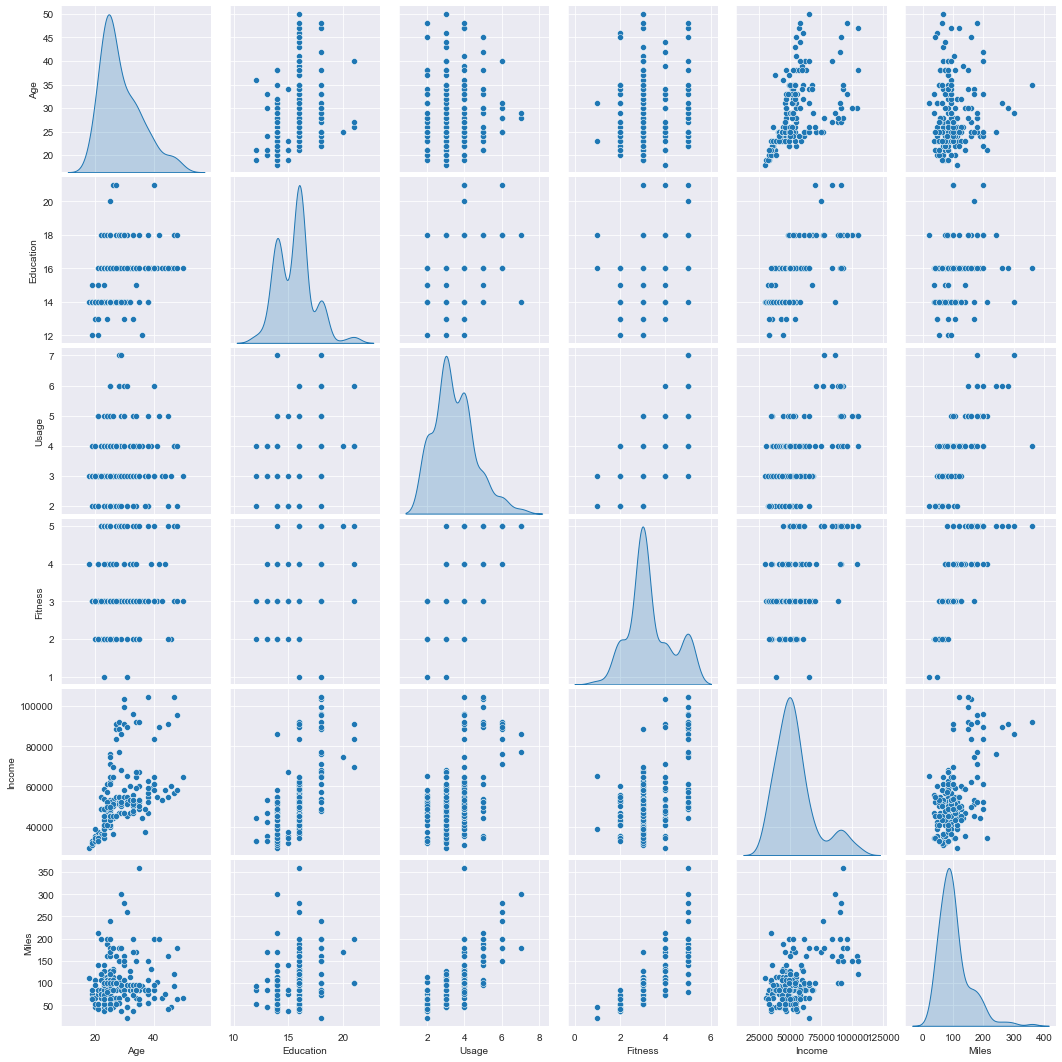

In [21]:
# Pair plot
sns.pairplot(df,diag_kind="kde");

**Numerical vs. Numerical**
1. Scatter plot
2. Line plot
3. Heatmap for correlation
4. Joint plot
5. Linear Regression plot

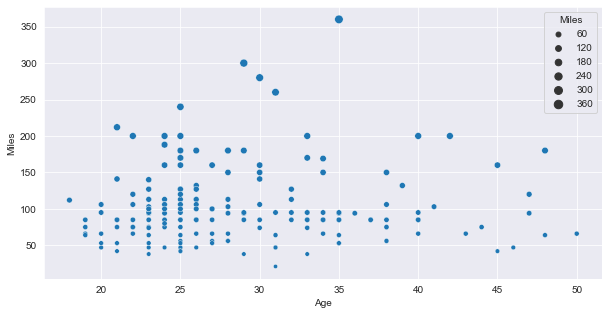

In [22]:
# Scatter plot
figure = plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Age',y='Miles', data=df, size = "Miles")

Observation:
1. From the plot, we can find that customer whose age is between 25 and 35 runs a lot.

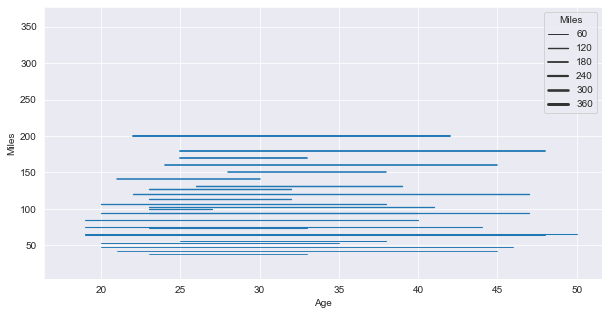

In [23]:
# Line plot
figure = plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Age',y='Miles', data=df, size = "Miles")

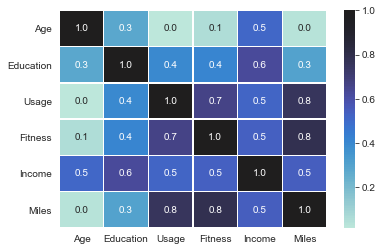

In [24]:
# Heatmap
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 );


Observation:
1. From the heatmap, we can find that Fitness has strong positie correlation of Usage and Miles
   In other word, the product gets higher rate if customer use it frequently.

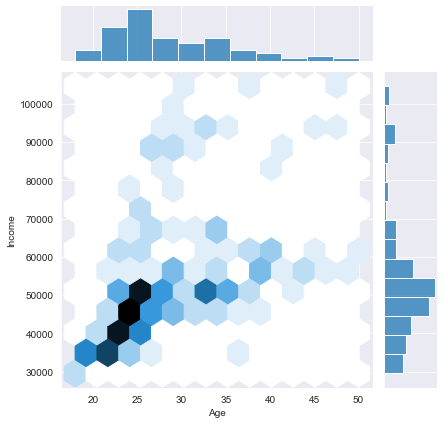

In [25]:
# Joint plot
sns.jointplot(data = df, x = 'Age', y = 'Income', kind="hex");

Observation:
1. From the result, we can find that most customer are ~25 years old with 50000 income.

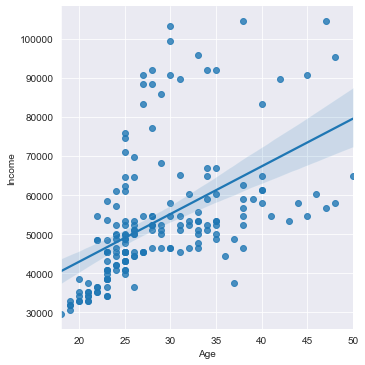

In [26]:
# Linear Regression plot
sns.lmplot(x= 'Age',y='Income', data=df);

# use linear regression to see the trand.

**Numerical vs Categorical**
1. Bar chart
2. Violin plot
3. Categorical box plot
4. Swarm plot

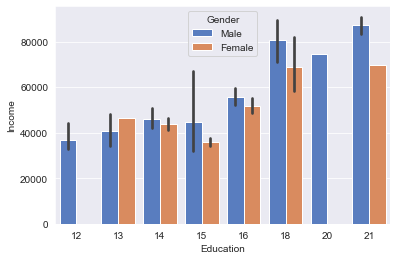

In [27]:
# Check Education versus Income
sns.barplot(x='Education', y='Income', data=df, palette='muted',hue='Gender');

Observation:
1. Customers who have higher education have better income.

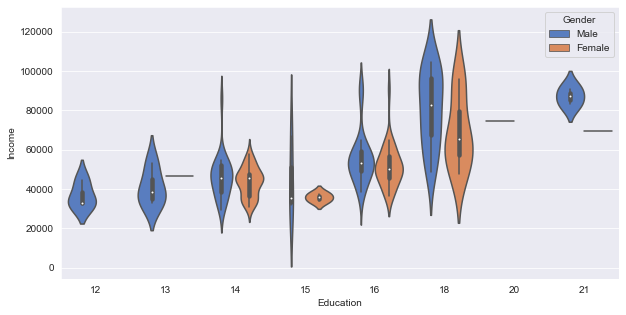

In [28]:
# Violin Plot
plt.figure(figsize=(10,5))
sns.violinplot(x='Education', y='Income', data=df, palette='muted',hue='Gender');

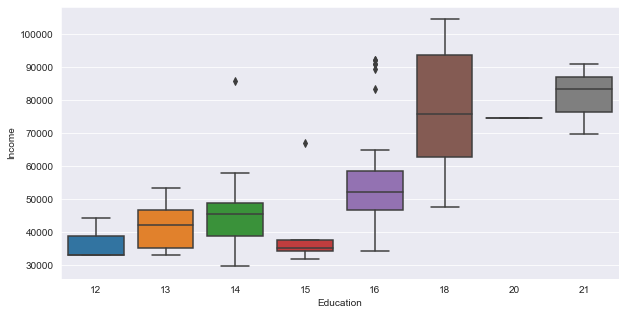

In [29]:
# Categorical box plot
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x='Education', y='Income');

Observation:
1. From the result, we can find that there are some outliers for Eductaiton 14,15,16

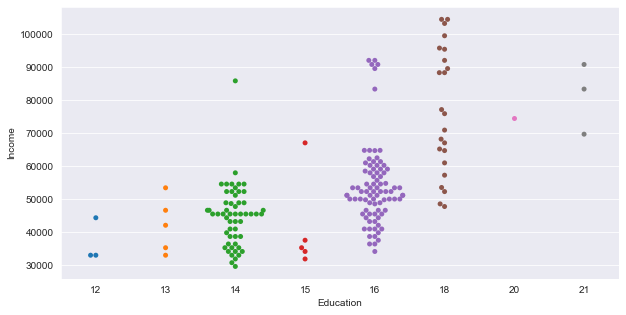

In [30]:
# Swarm plot
plt.figure(figsize=(10,5))
sns.swarmplot(data = df, x='Education', y='Income');

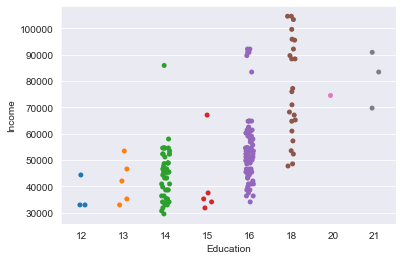

In [31]:
# Strip plot
sns.stripplot(data = df, x='Education', y='Income');

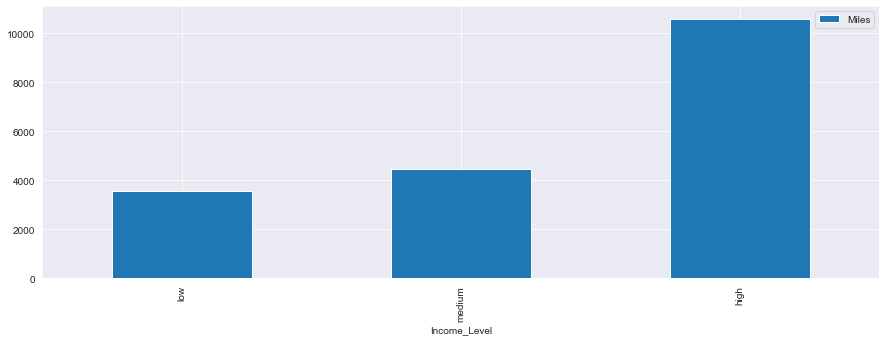

In [32]:
df.groupby(by=['Income_Level'])['Miles'].sum().reset_index().sort_values(['Miles']).plot(x='Income_Level',y='Miles',kind='bar',figsize=(15,5))
plt.show()

Observation:
1. We can find that customer has better income excercise a lot.

## Pandas-Profiling Report ##

In [33]:
profile = ProfileReport(df, title = 'Pandas Profiling Report',html={'style':{'full_width':True}})
#profile.to_widgets()

In [34]:
# Getting the pandas profiling report 
profile.to_notebook_iframe()

# Save pandas profiling report as html
profile.to_file("../Desktop/output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion ##

1. There are total 9 attributes in this dataset. Six of them are int64 and three of them are object.
2. There are total 180 rows and 9 columns in this dataset. No missing value is found.
3. df.describe() shows the statistical summary of numerical values.
4. df.attribute.value_counts() shows the count of specific attribute.
5. pd.cut() can split the numerical value into bins. Here, we cut Income (numerical value) into Income_Level (high, medium, low).
6. For univarite data analysis
   * we use sns.countplot to check count versus Income_level. We found most of customer have high income.
   * we use sns.histplot to check count versus Age. We found most of customer are around 25 years old.
   * we use sns.distplot to check cumulative distribution of Miles. The total miles is around 350.
7. For multivariate data analysis, we check Numerical vs. Numerical as following
   * we use sns.pairplot() to check the distribution of every attribute pairs.
   * we use sns.scatterplot() to check Age versus Miles. We can find that customer whose age is between 25 and 35 runs a lot.
   * we use sns.lineplot() to check Age versus Miles as well
   * we use sns.heatmap() to find the correlation of each attribute. We can find that Fitness has strong positive correlation of Usage and Miles.
   * we use sns.joinplot() to check Age versus Income. We can find that most customer are ~25 years old with 50000 income.
   * we use sns.lmplot() to check Age versus Income to see the trend.
8. For multivariate data analysis, we check Numerical vs. Categorical as following
   * we use sns.barplot() to check Education versus Income. We can find that customers who have higher education have better income.
   * we use sns.violinplot() to check Education versus Income.
   * we use sns.boxplot() to check Education versus Income. We can find that there are some outliers for Education 14,15,16.
   * we use sns.swarplot() to check Education versus Income.
   * we use sns.stripplot() to check Education versus Income.
   * we use df.gorupby().plot to check Income_level versus Miles. We can find that customer has better income exercise a lot.

9. We use pandas-profiling for overview.